# validate_pond_optical_property_namelist

Notebook to validate that options for pond optical properties are having desired effects.

In [1]:
import os
import datetime

import icepacktools as ipt

In [4]:
# Load history output
ip_dirs_path = "/root/icepack-dirs"
run_dict = {"base": None,
            "test_hp_nochange": None,
            "test_hp0_0.05": None,
            "test_hpmin_0.05": None,
            "test_ki_p_nochange": None,
            "test_ki_p_20.2": None,
            "test_ki_p_10.2": None,
            "test_ki_p_0.2": None,
            }
trcr_dict = {17: 'alvl',
             18: 'vlvl',
             19: 'apnd',
             20: 'hpnd',
             21: 'ipnd',
             }
trcrn_dict = {17: 'alvln',
              18: 'vlvln',
              19: 'apndn',
              20: 'hpndn',
              21: 'ipndn',
              }

hist_dict = {}
for key, value in run_dict.items():
    hist_dict[key] = ipt.load_icepack_hist(run_name=key, 
                                           icepack_dirs_path=ip_dirs_path, 
                                           hist_filename=value,
                                           compute_albedo_ai=True,
                                           trcr_dict=trcr_dict,
                                           trcrn_dict=trcrn_dict)

/root/code/icepack_postprocessing/icepacktools.py:118: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = ds.indexes['time'].to_datetimeindex()
/root/code/icepack_postprocessing/icepacktools.py:118: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = ds.indexes['time'].to_datetimeindex()
/root/code/icepack_postprocessing/icepacktools.py:118: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operat

In [3]:
# Check that the modified outputs match the consortium main
comp = "test_hp_nochange"
# Check whether or not dataarrays are identical
for ni in [1, 2, 3, 4]:
    print(ni)
    for key, da in hist_dict["base"].sel(ni=ni).data_vars.items():
        if not da.equals(hist_dict[comp].sel(ni=ni)[key]):
            print(key)
            print('max diff: ' + str((hist_dict[comp].sel(ni=ni)[key] - da).max().values))
            print('min diff: ' + str((hist_dict[comp].sel(ni=ni)[key] - da).min().values))
print("Above are data arrays that do not match.")


1
2
3
4
Above are data arrays that do not match.


In [5]:
# Check that the modified outputs match the consortium main
comp = "test_ki_p_nochange"
# Check whether or not dataarrays are identical
for ni in [1, 2, 3, 4]:
    print(ni)
    for key, da in hist_dict["base"].sel(ni=ni).data_vars.items():
        if not da.equals(hist_dict[comp].sel(ni=ni)[key]):
            print(key)
            print('max diff: ' + str((hist_dict[comp].sel(ni=ni)[key] - da).max().values))
            print('min diff: ' + str((hist_dict[comp].sel(ni=ni)[key] - da).min().values))
print("Above are data arrays that do not match.")


1
2
3
4
Above are data arrays that do not match.


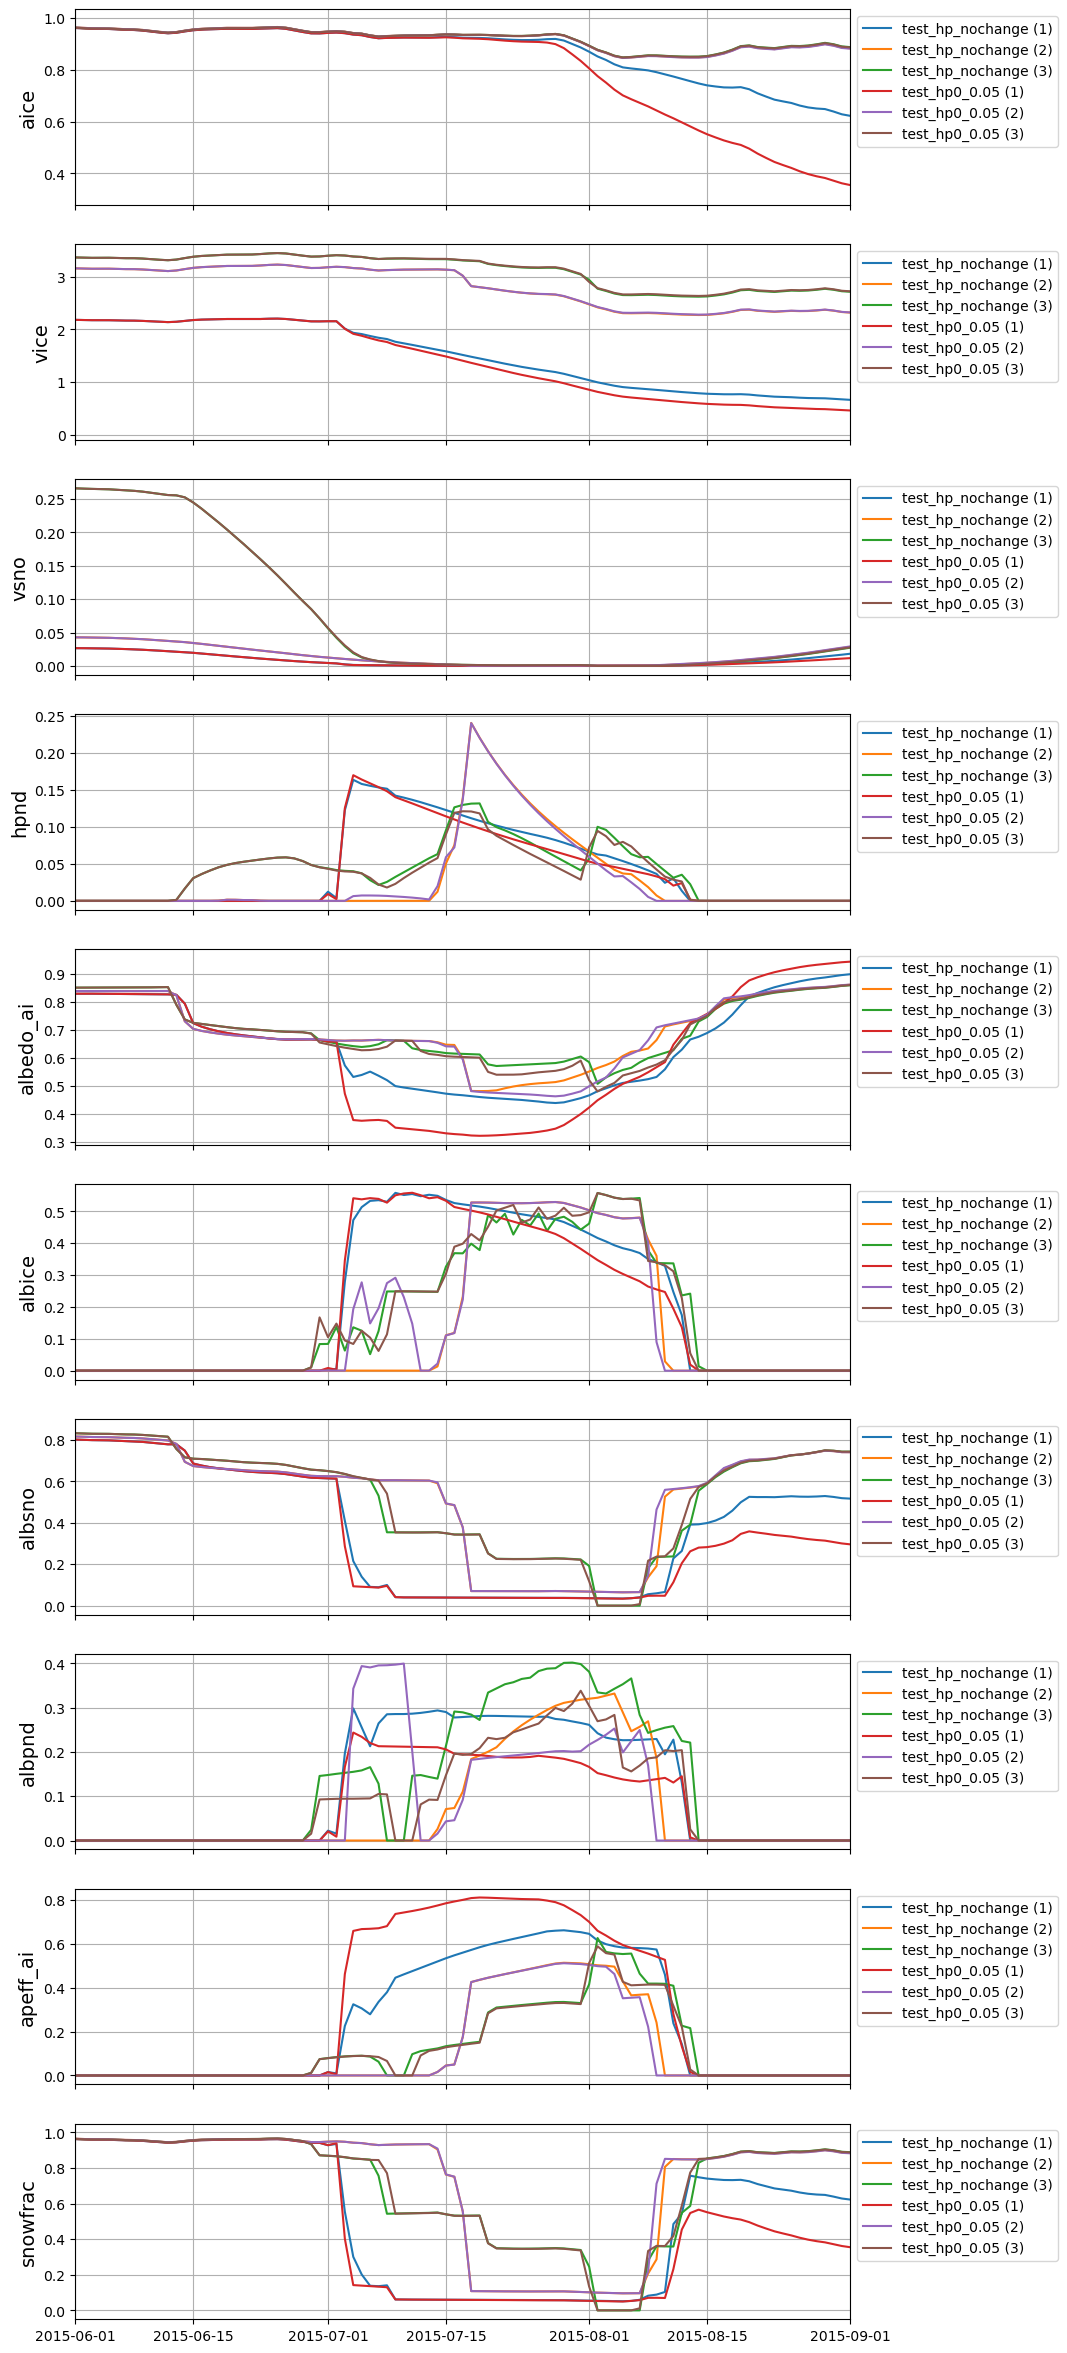

In [7]:
# Plot comparison with hp0 = 0.05
run_plot_dict = {"test_hp_nochange": [1, 2, 3],
                 "test_hp0_0.05": [1, 2, 3],
                 }
var_names = ['aice', 'vice', 'vsno', 'hpnd', 'albedo_ai', 'albice', 'albsno', 'albpnd', 'apeff_ai', 'snowfrac']
xlim = [datetime.datetime.fromisoformat('2015-06-01'),
                  datetime.datetime.fromisoformat('2015-09-01')]

f, axs = ipt.plot_handler(run_plot_dict, var_names, hist_dict, xlim=xlim, resample='D')

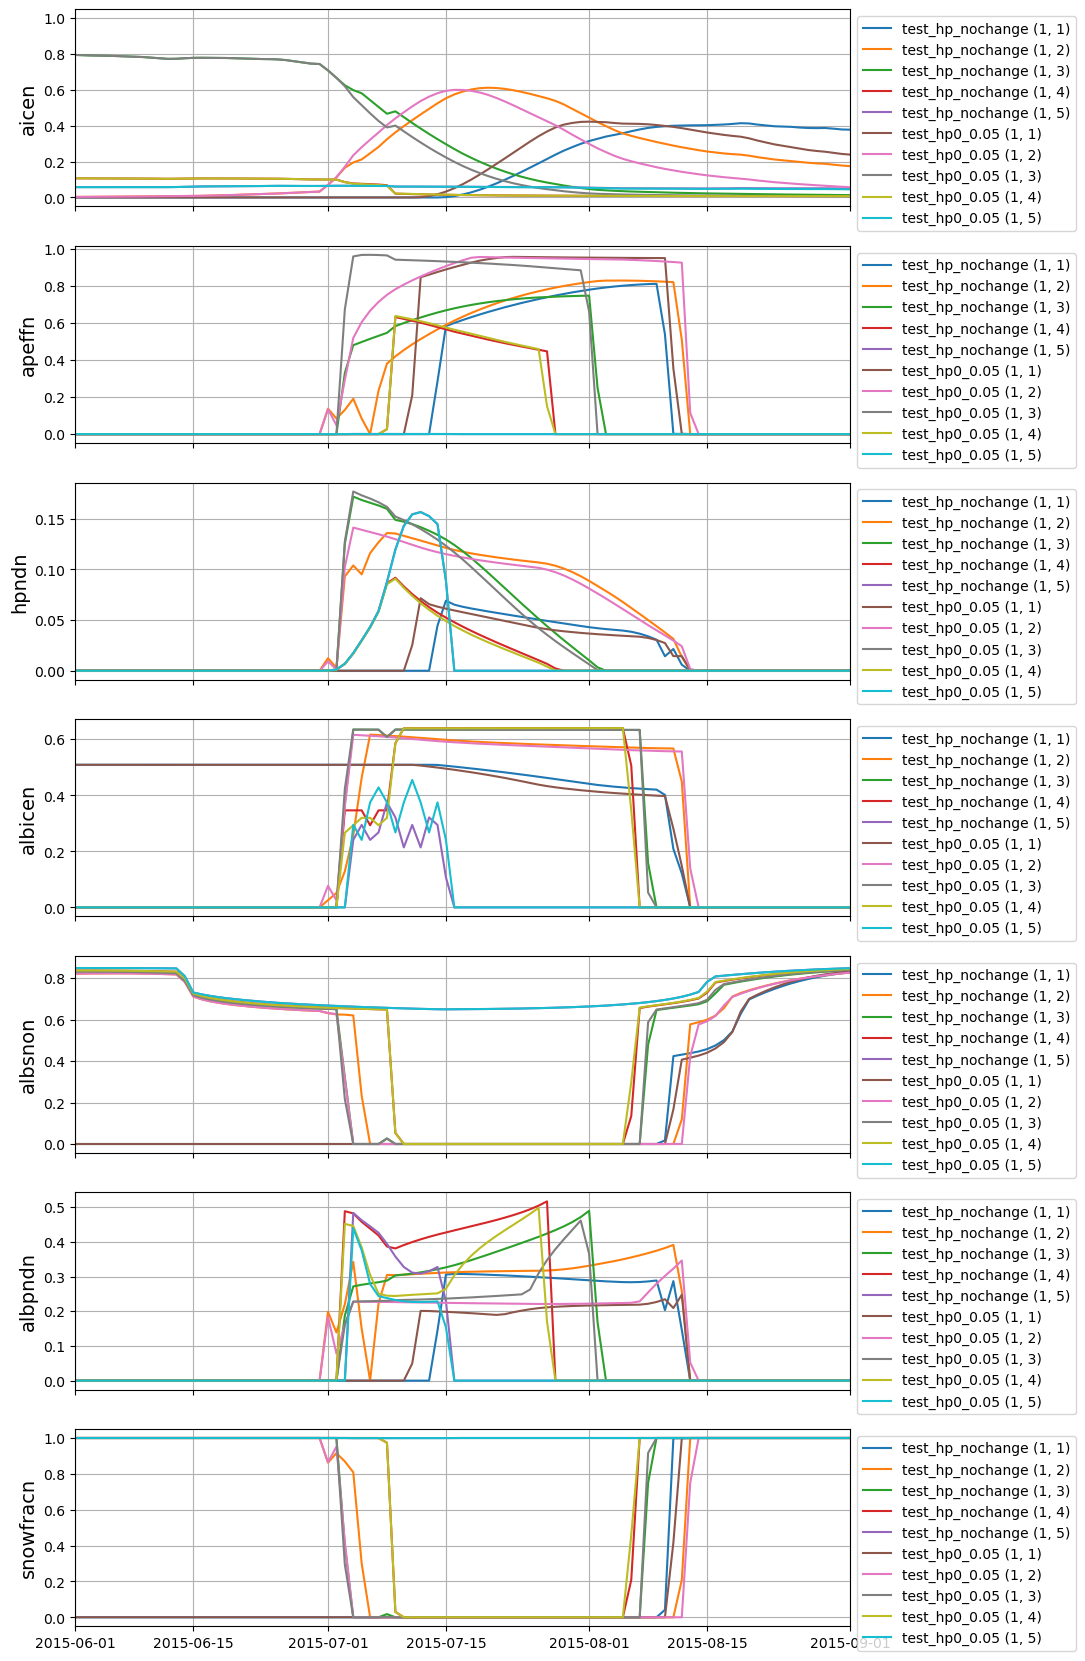

In [8]:
# Highlight what's happening with per category pond depths and area fraction for ni= 1
run_plot_dict = {"test_hp_nochange": [1],
                 "test_hp0_0.05": [1],
                 }
var_names = ['aicen', 'apeffn', 'hpndn', 'albicen', 'albsnon', 'albpndn', 'snowfracn']
xlim = [datetime.datetime.fromisoformat('2015-06-01'),
                  datetime.datetime.fromisoformat('2015-09-01')]

f, axs = ipt.plot_handler(run_plot_dict, var_names, hist_dict, xlim=xlim, resample='D')

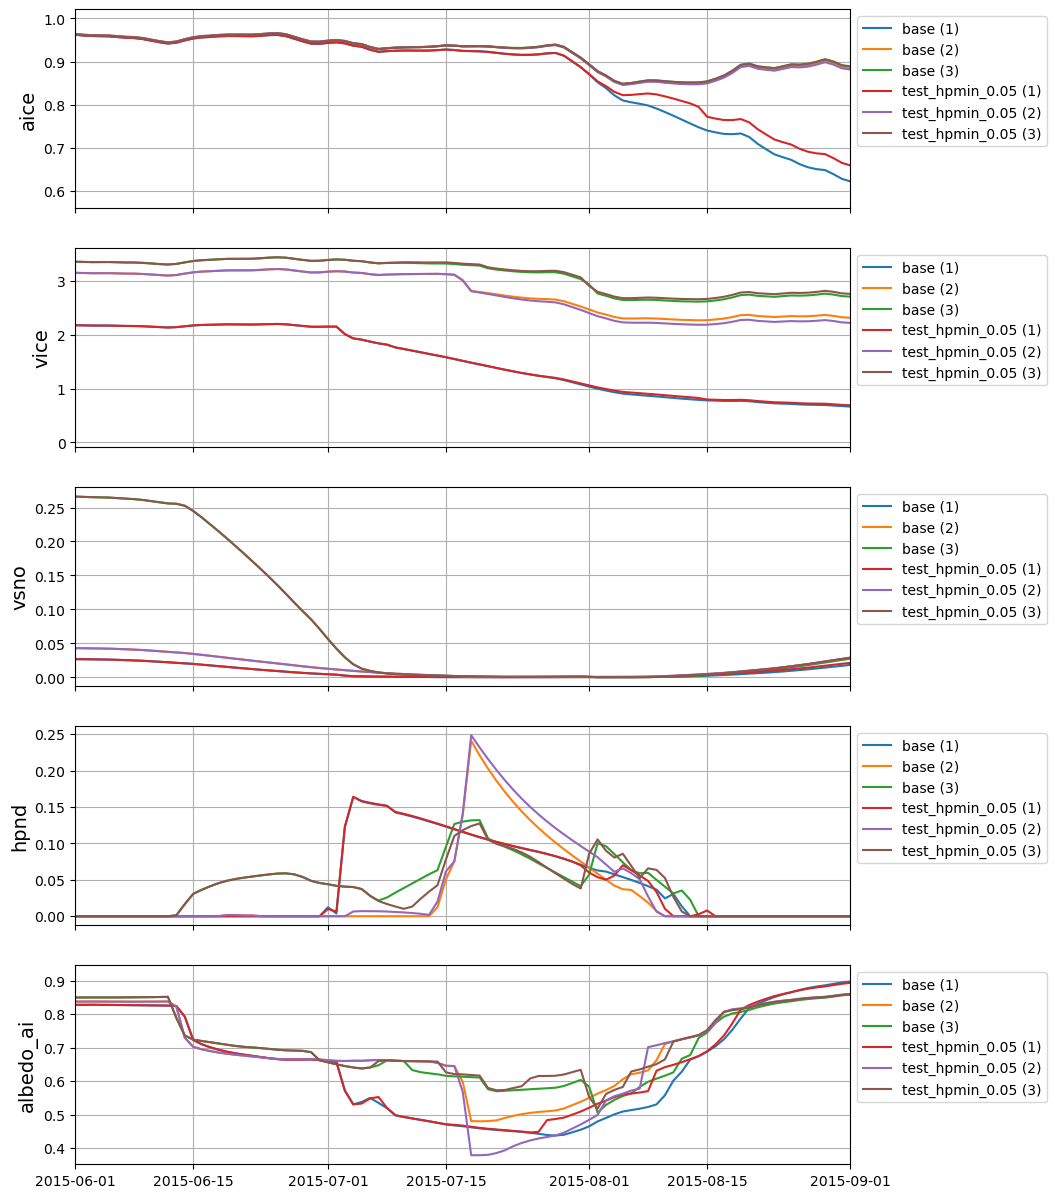

In [5]:
# Plot comparison with hpmin = 0.05
run_plot_dict = {"test_hp_nochange": [1, 2, 3],
                 "test_hpmin_0.05": [1, 2, 3],
                 }
var_names = ['aice', 'vice', 'vsno', 'hpnd', 'albedo_ai']
xlim = [datetime.datetime.fromisoformat('2015-06-01'),
                  datetime.datetime.fromisoformat('2015-09-01')]

f, axs = ipt.plot_handler(run_plot_dict, var_names, hist_dict, xlim=xlim, resample='D')

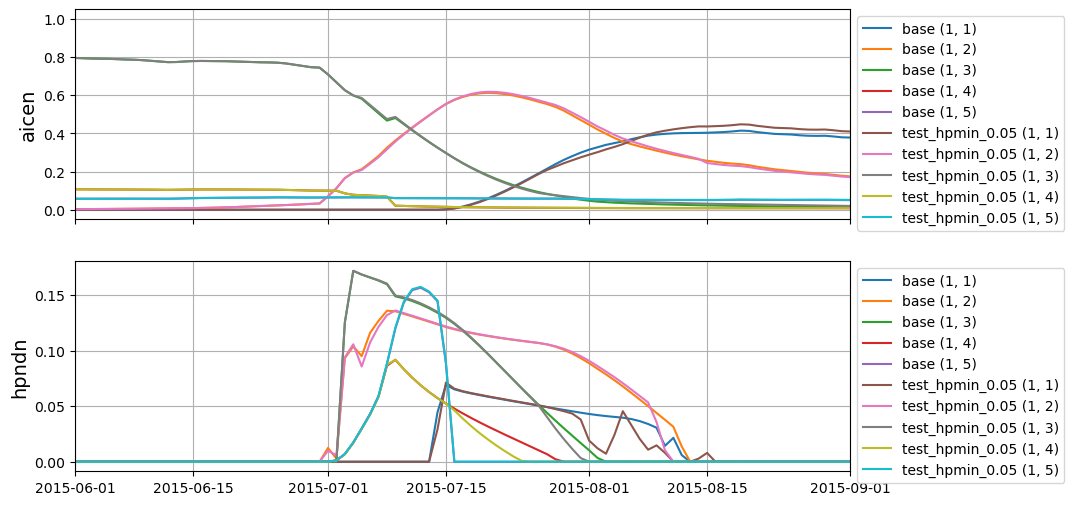

In [8]:
# Highlight what's happening with per category pond depths and area fraction for ni= 1
run_plot_dict = {"test_hp_nochange": [1],
                 "test_hpmin_0.05": [1],
                 }
var_names = ['aicen', 'hpndn']
xlim = [datetime.datetime.fromisoformat('2015-06-01'),
                  datetime.datetime.fromisoformat('2015-09-01')]

f, axs = ipt.plot_handler(run_plot_dict, var_names, hist_dict, xlim=xlim, resample='D')

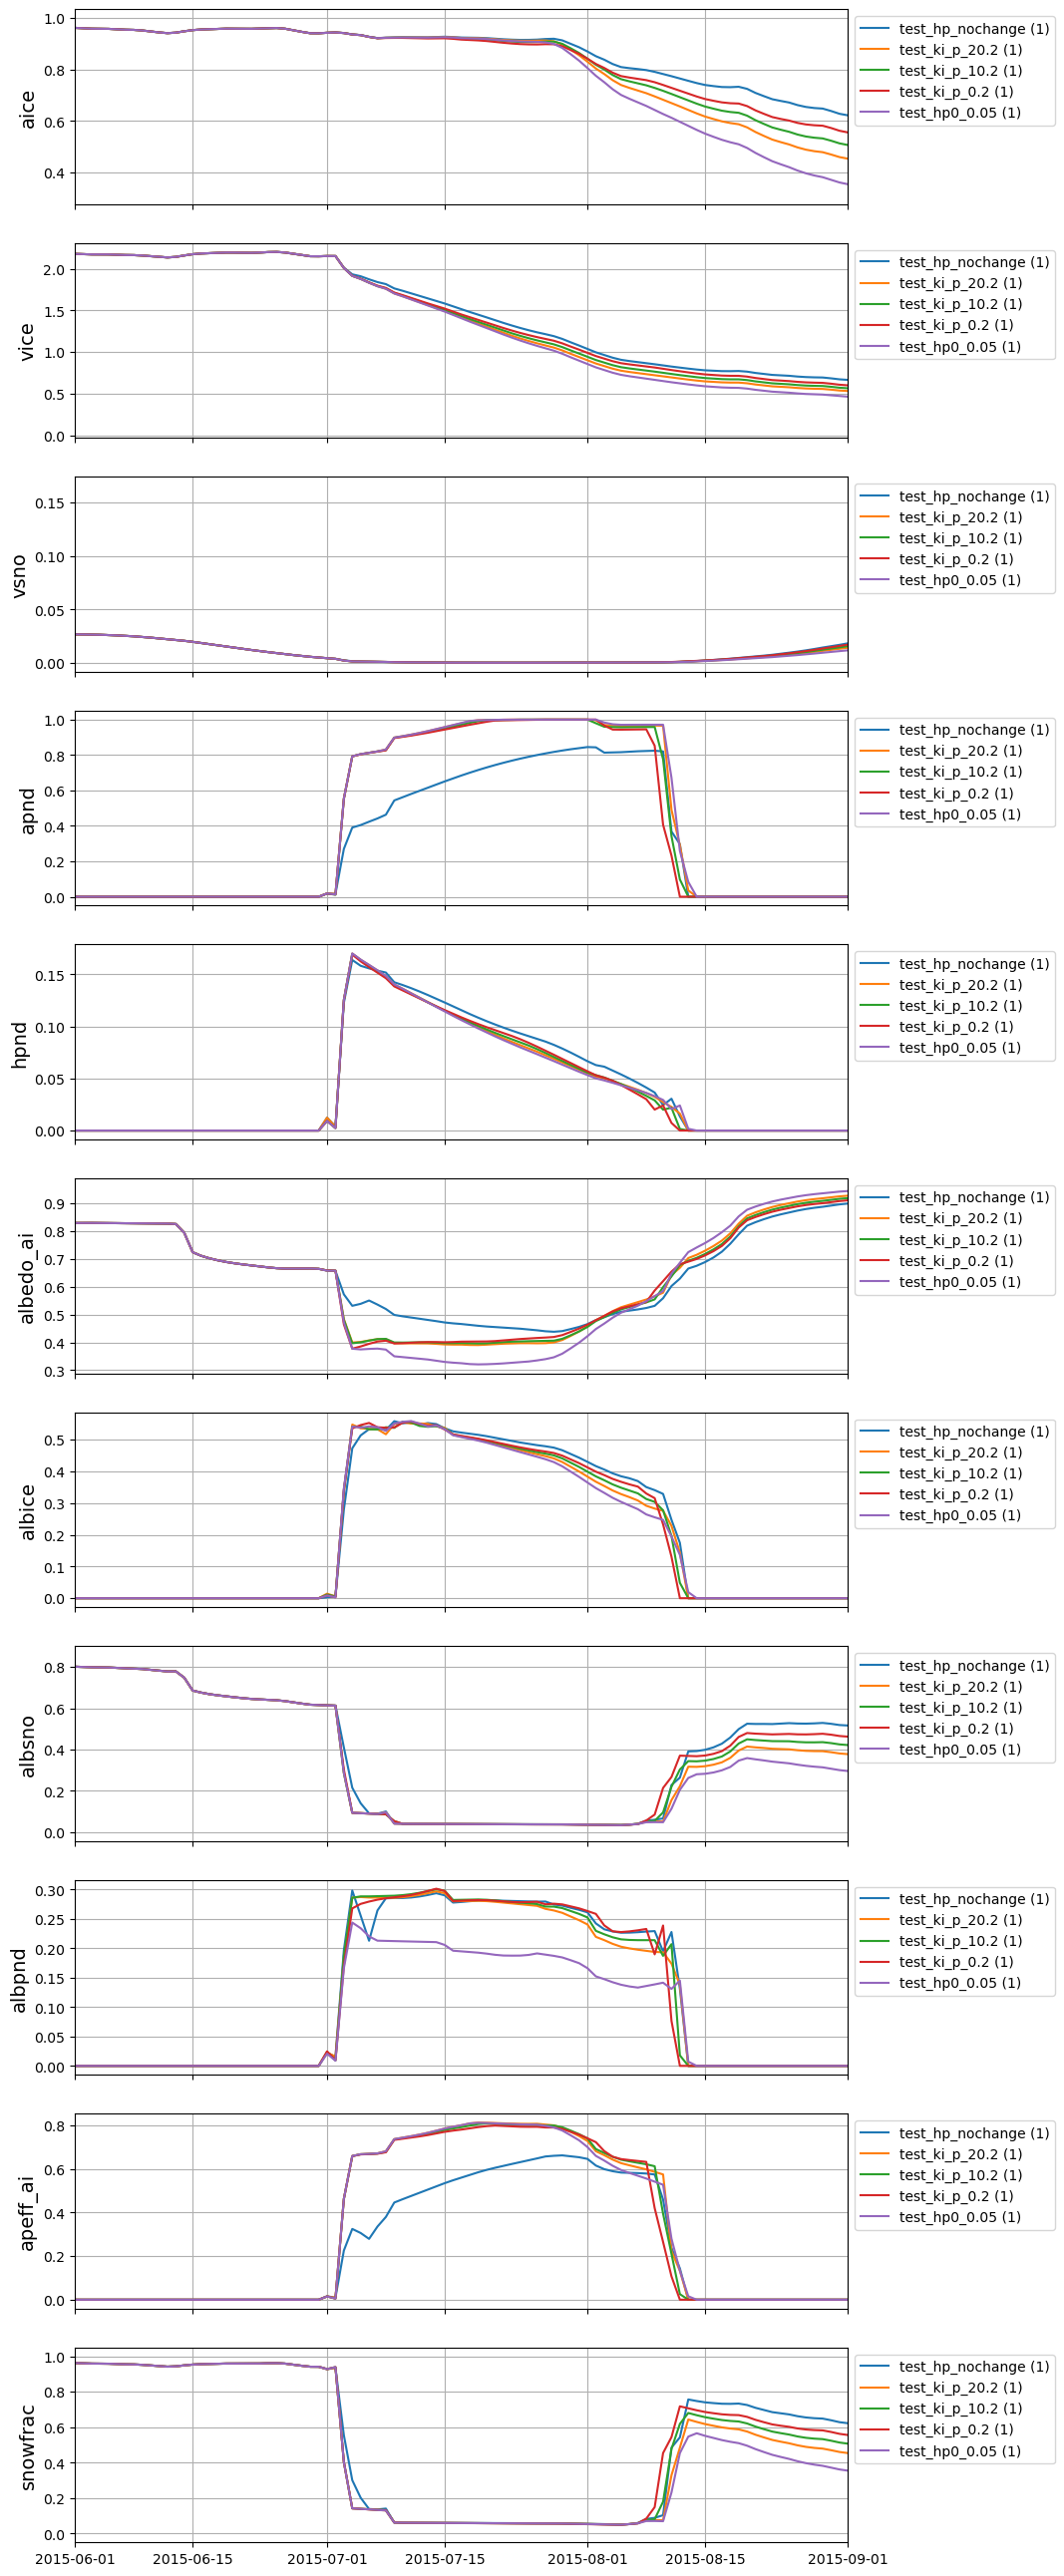

In [12]:
# Plot comparison with ki_p
run_plot_dict = {"test_hp_nochange": [1],
                 "test_ki_p_20.2": [1],
                 "test_ki_p_10.2": [1],
                 "test_ki_p_0.2": [1],
                 "test_hp0_0.05": [1],
                 }
var_names = ['aice', 'vice', 'vsno', 'apnd', 'hpnd', 'albedo_ai', 'albice', 'albsno', 'albpnd', 'apeff_ai', 'snowfrac']
xlim = [datetime.datetime.fromisoformat('2015-06-01'),
                  datetime.datetime.fromisoformat('2015-09-01')]

f, axs = ipt.plot_handler(run_plot_dict, var_names, hist_dict, xlim=xlim, resample='D')

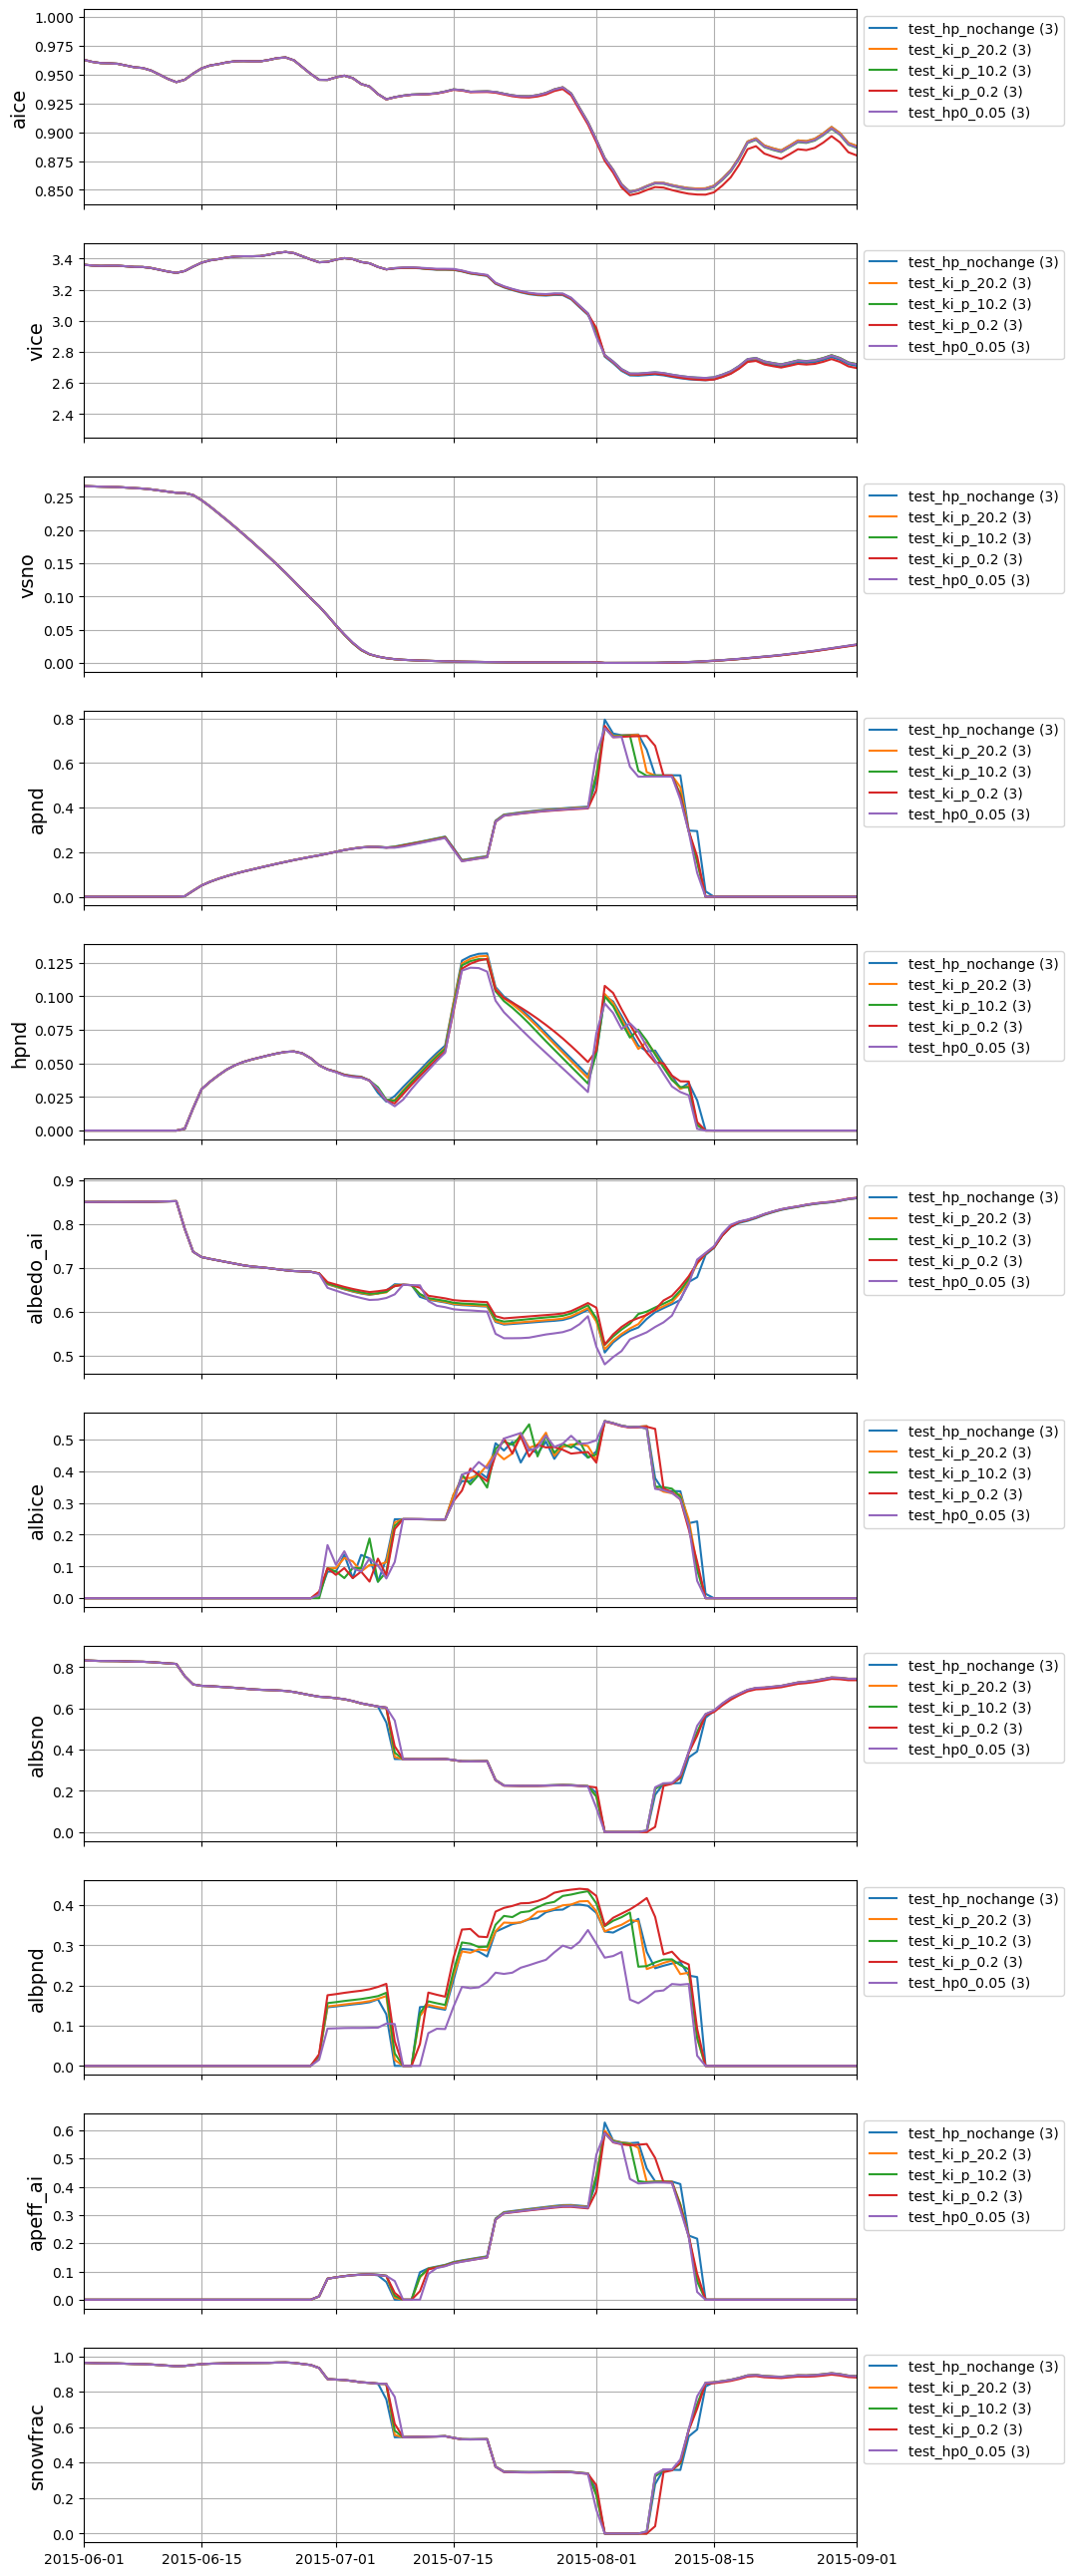

In [10]:
# Plot comparison with ki_p
run_plot_dict = {"test_hp_nochange": [3],
                 "test_ki_p_20.2": [3],
                 "test_ki_p_10.2": [3],
                 "test_ki_p_0.2": [3],
                 "test_hp0_0.05": [3],
                 }
var_names = ['aice', 'vice', 'vsno', 'apnd', 'hpnd', 'albedo_ai', 'albice', 'albsno', 'albpnd', 'apeff_ai', 'snowfrac']
xlim = [datetime.datetime.fromisoformat('2015-06-01'),
                  datetime.datetime.fromisoformat('2015-09-01')]

f, axs = ipt.plot_handler(run_plot_dict, var_names, hist_dict, xlim=xlim, resample='D')

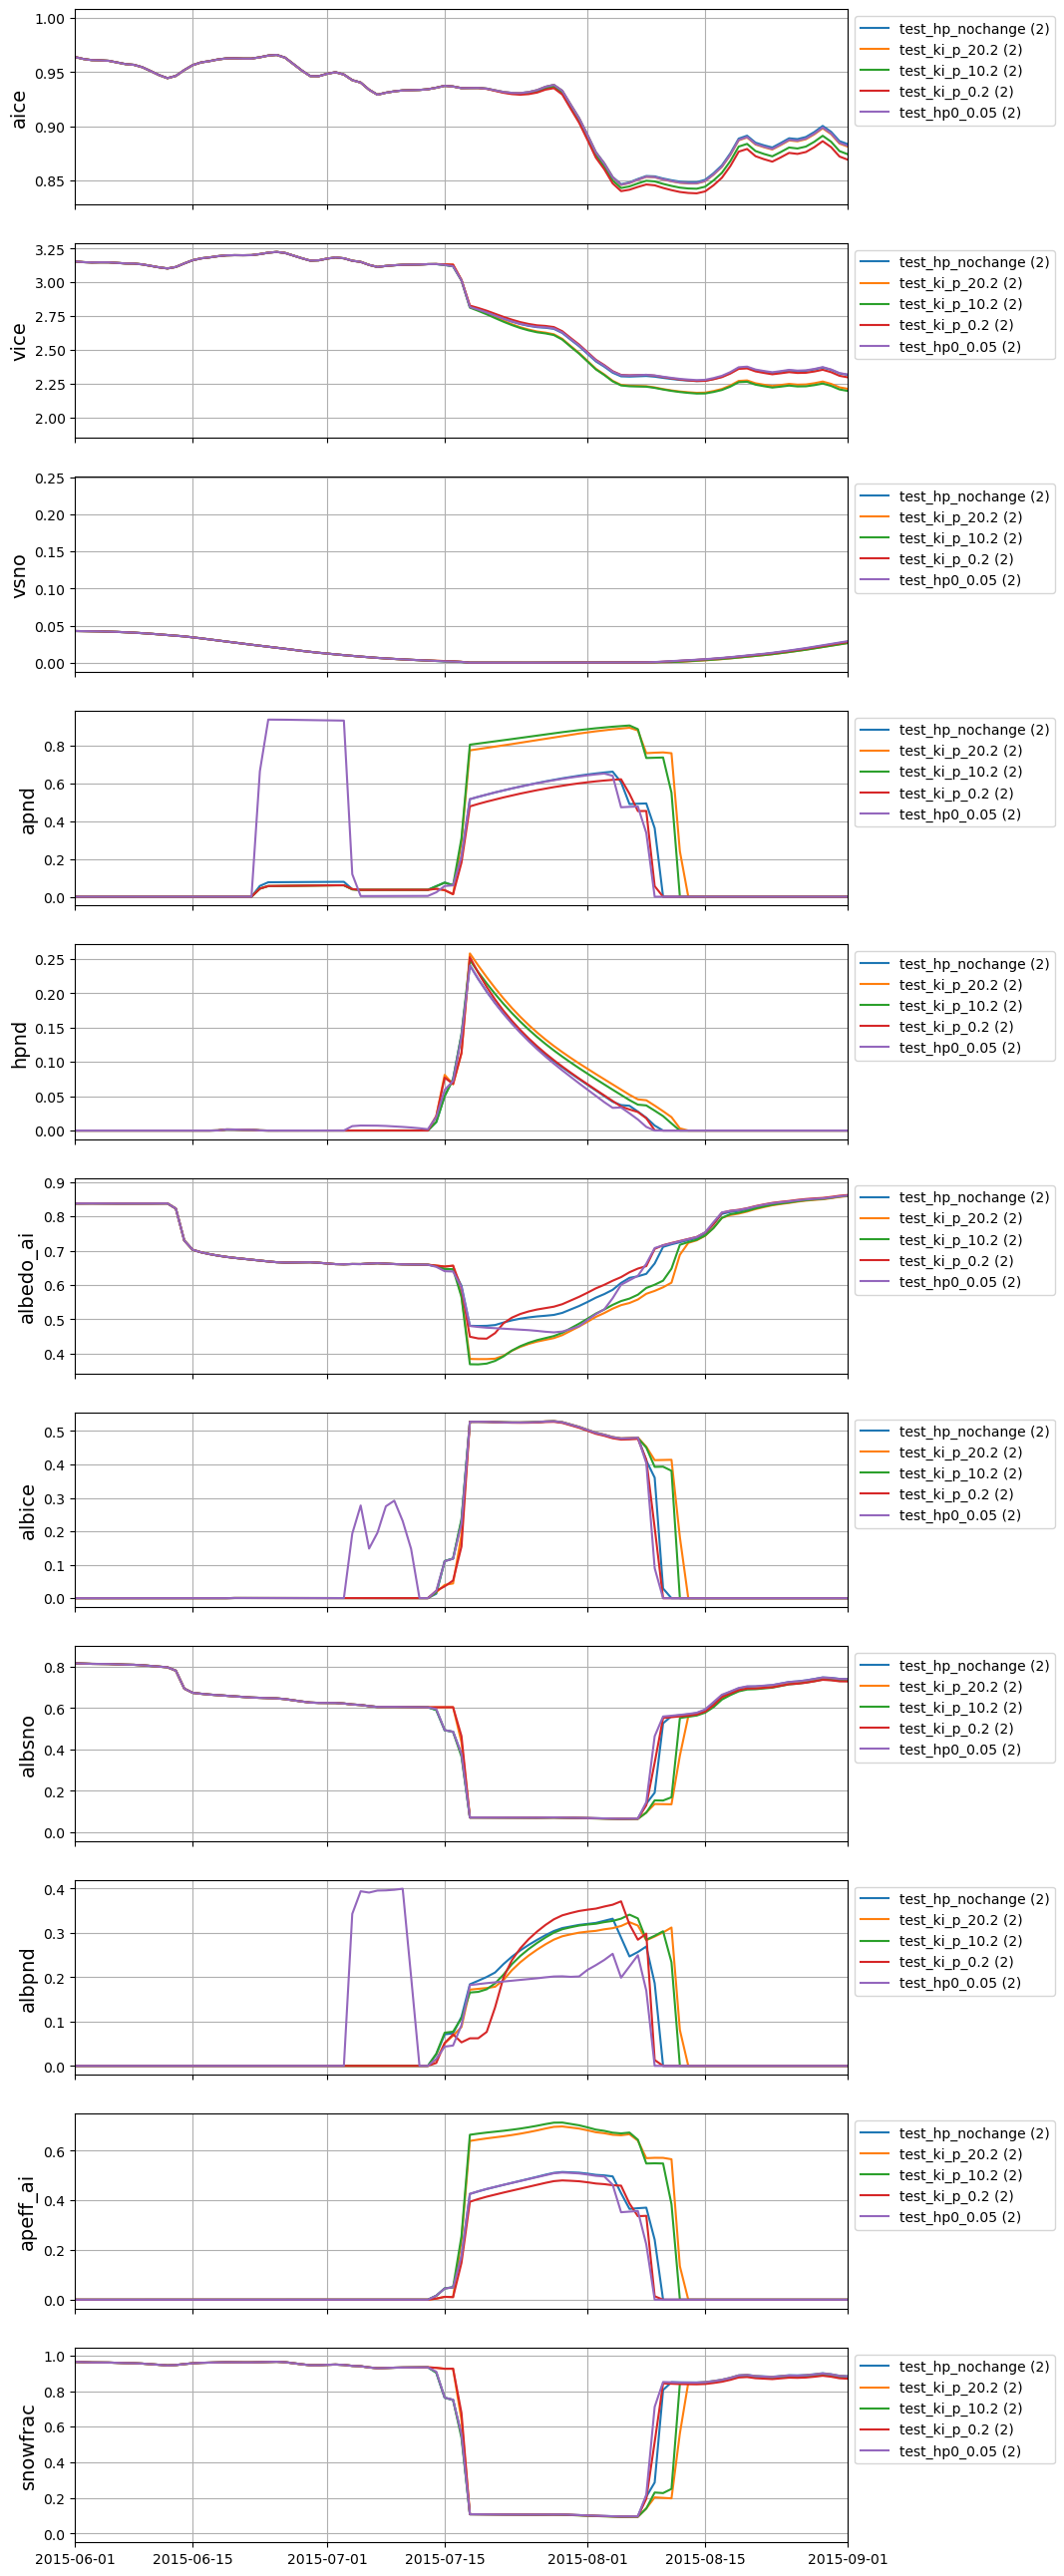

In [11]:
# Plot comparison with ki_p
run_plot_dict = {"test_hp_nochange": [2],
                 "test_ki_p_20.2": [2],
                 "test_ki_p_10.2": [2],
                 "test_ki_p_0.2": [2],
                 "test_hp0_0.05": [2],
                 }
var_names = ['aice', 'vice', 'vsno', 'apnd', 'hpnd', 'albedo_ai', 'albice', 'albsno', 'albpnd', 'apeff_ai', 'snowfrac']
xlim = [datetime.datetime.fromisoformat('2015-06-01'),
                  datetime.datetime.fromisoformat('2015-09-01')]

f, axs = ipt.plot_handler(run_plot_dict, var_names, hist_dict, xlim=xlim, resample='D')

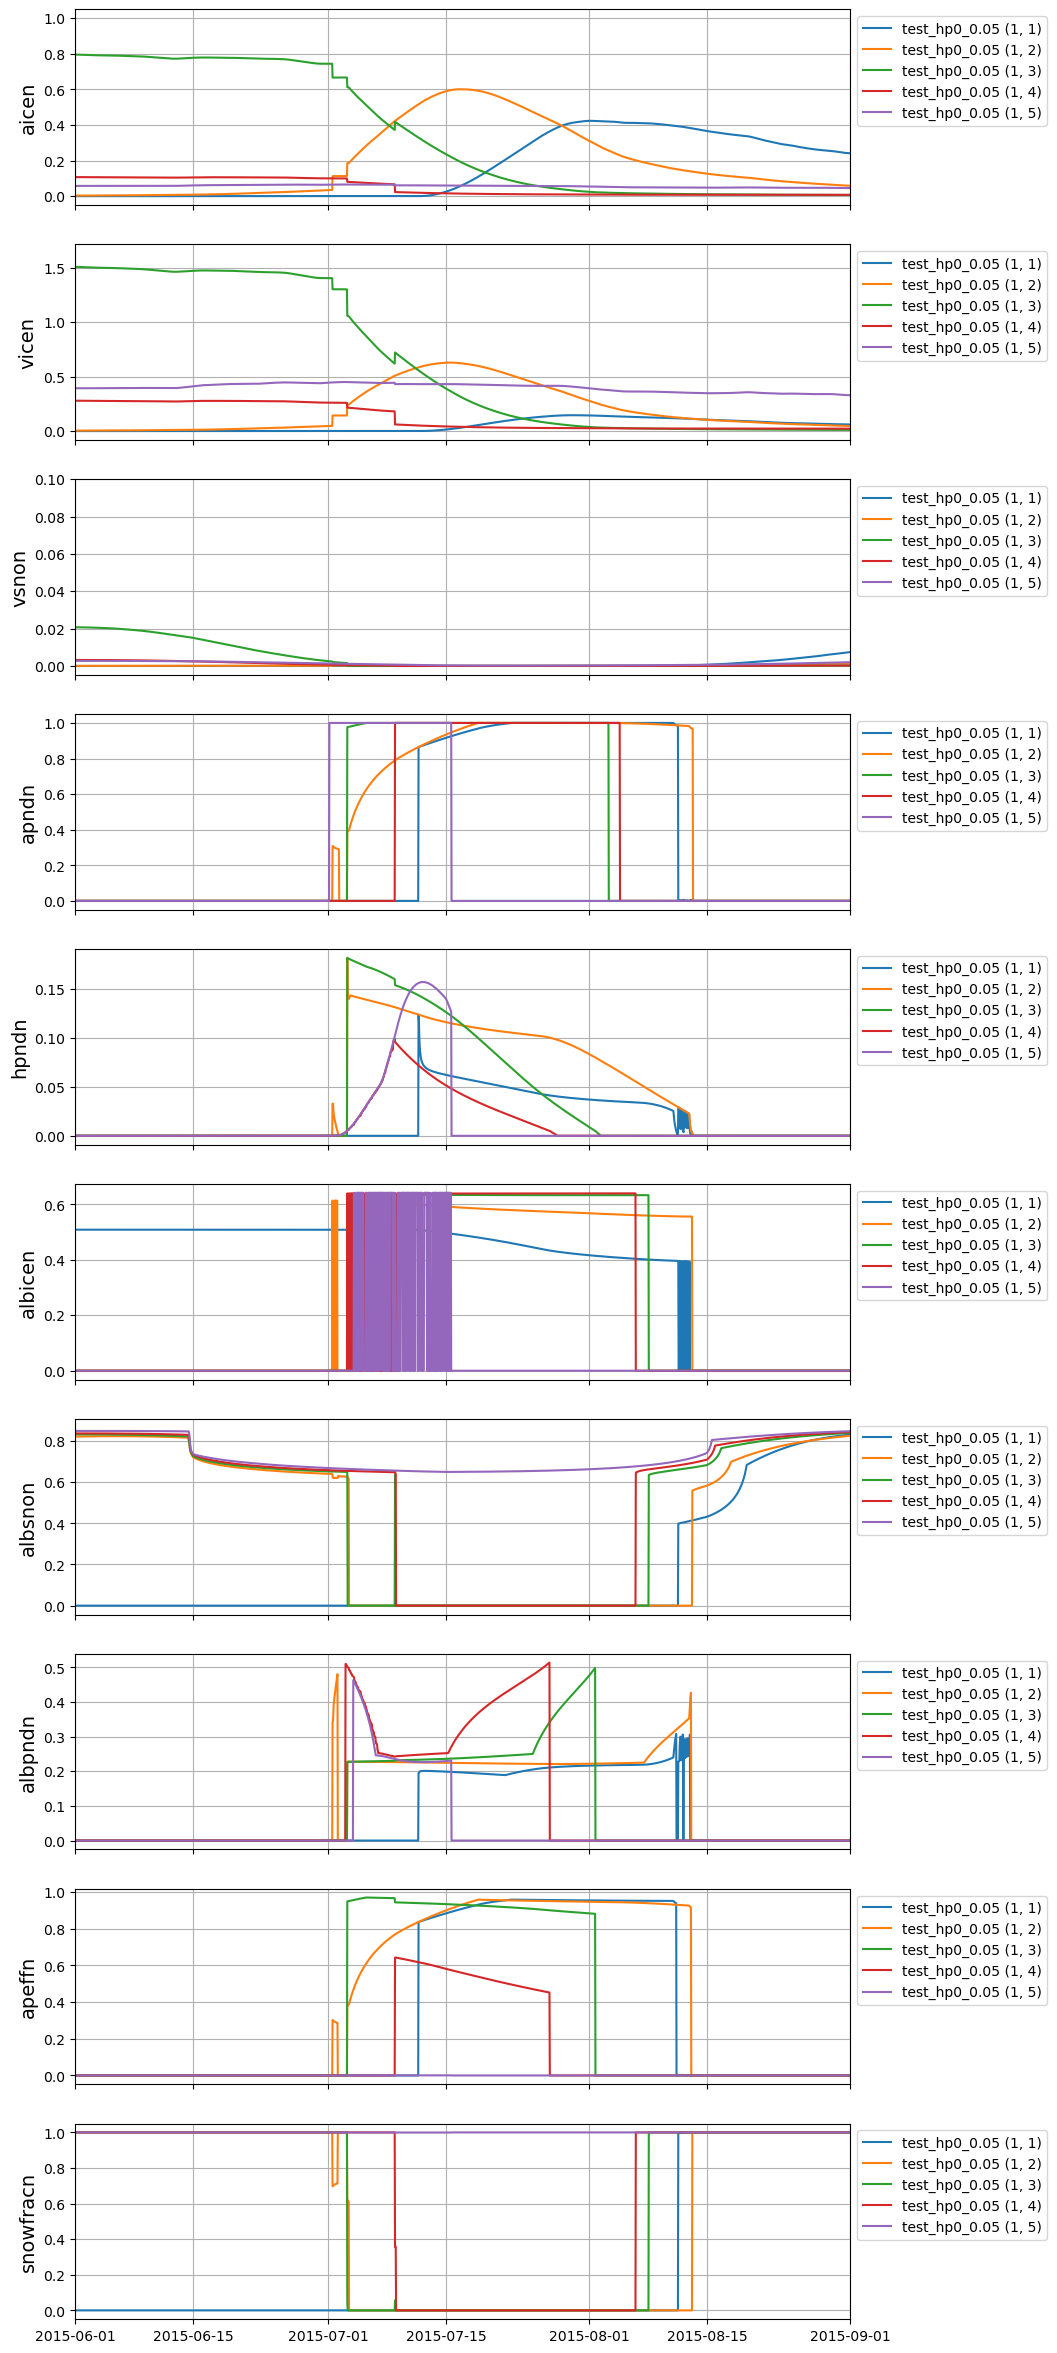

In [13]:
# Plot comparison with ki_p
run_plot_dict = {"test_hp0_0.05": [1],
                 }
var_names = ['aicen', 'vicen', 'vsnon', 'apndn', 'hpndn', 'albicen', 'albsnon', 'albpndn', 'apeffn', 'snowfracn']
xlim = [datetime.datetime.fromisoformat('2015-06-01'),
                  datetime.datetime.fromisoformat('2015-09-01')]

f, axs = ipt.plot_handler(run_plot_dict, var_names, hist_dict, xlim=xlim)
